<a href="https://colab.research.google.com/github/Bryan-Az/Dimensionality_Reduction/blob/main/DimensionalityReduction_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Dimensionality Reduction and Clustering
In this notebook, I will be using the output tsne_art.csv and UMAP_art.csv of the Dimensionality Reduction notebook in this same repo to cluster on.
UMAP and t-SNE are two of the most popular dimensionality reduction algorithms used to visualize high dimensional data. They are both non-linear dimensionality reduction techniques, which means that they are able to capture non-linear structure in data while PCA is not able to do so. However, UMAP and t-SNE are not able to preserve global structure in the data, which means that they are not able to preserve distances between clusters. This is why I will be using the output of these two algorithms to cluster on.
1. I will be using the K-Means clustering algorithm to cluster on the output of these two algorithms. K-Means is a clustering algorithm that is able to cluster on data that is not linearly separable.
2. I will be using the elbow method to determine the optimal number of clusters for each algorithm.
3. I will then be comparing the clusters of each algorithm to see if there are any similarities between the two algorithms by visualization.

## Data Loading

In [19]:
tsne_art = pd.read_csv('./data_samples/tsne_art.csv')
umap_cyber = pd.read_csv('./data_samples/umap_cybersecurity.csv')

In [20]:
tsne_art.head()

,t-SNE1,t-SNE2
0,2.089915,-23.602427
1,9.563380,-1.854760
2,-12.466550,6.004730
3,9.952030,-2.543584
4,-5.667890,-9.673102


In [21]:
umap_cyber.head()

,UMAP1,UMAP2
0,6.090585,-7.161148
1,13.751868,10.544777
2,11.418718,11.608393
3,10.542574,9.488722
4,12.466639,15.125901


# Clustering

## t-SNE (t-Stochastic Neighbor Embedding)

#### Using elbow-method to find optimal K

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

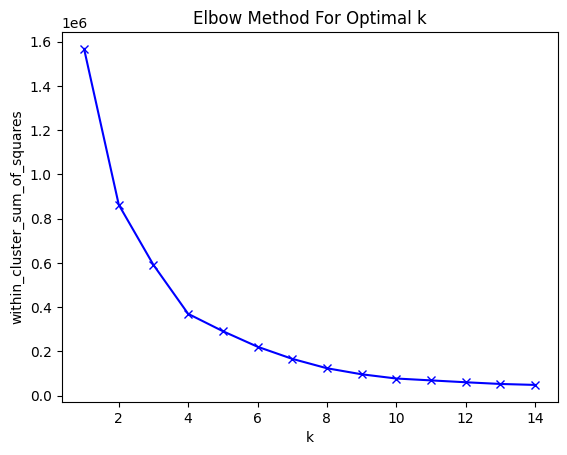

In [23]:
within_cluster_sum_of_squares = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tsne_art)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
plt.plot(range(1, 15), within_cluster_sum_of_squares, 'bx-')
plt.xlabel('k')
plt.ylabel('within_cluster_sum_of_squares')
plt.title('Elbow Method For Optimal k')
plt.show()

### Visualizing the optimal clusters

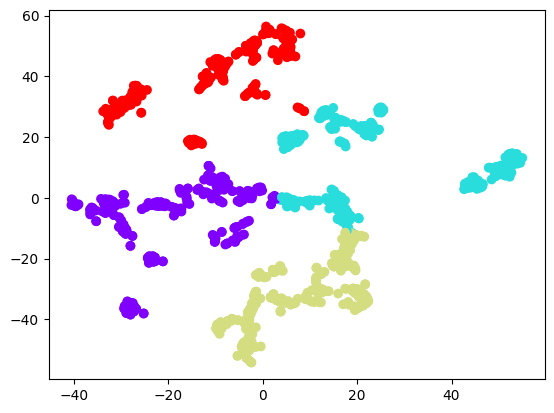

In [24]:
# given the elbow shows 4 is the point where the WSS (within cluster sum of squares) is optimal
# we can now visualize the clusters created with k = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(tsne_art)
plt.scatter(tsne_art['t-SNE1'], tsne_art['t-SNE2'], c=kmeans.labels_, cmap='rainbow')

## UMAP (Uniform Manifold and Approximation)

#### Using elbow-method to find optimal K

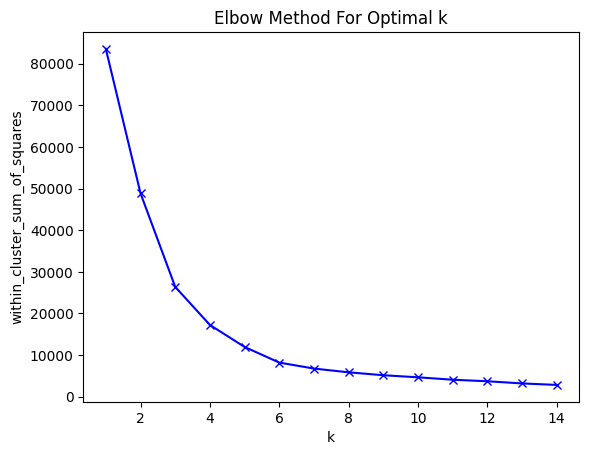

In [25]:
within_cluster_sum_of_squares = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(umap_cyber)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
plt.plot(range(1, 15), within_cluster_sum_of_squares, 'bx-')
plt.xlabel('k')
plt.ylabel('within_cluster_sum_of_squares')
plt.title('Elbow Method For Optimal k')
plt.show()

### Visualizing the optimal clusters

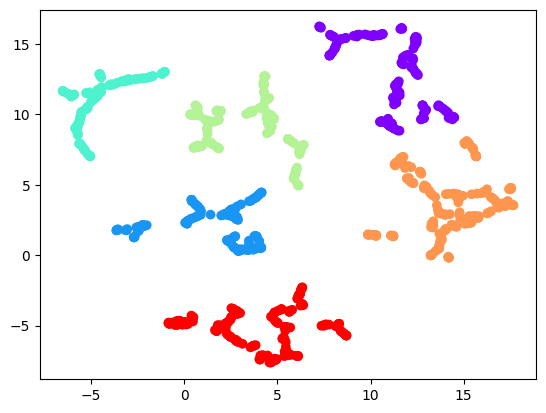

In [26]:
# the elbow is less sharp for the UMAP dimensionality reduced scaled art data,
# however, a value of 6 seems to be the point where the curve becomes flatter
# we can now visualize the clusters created with k = 5
kmeans = KMeans(n_clusters=6)
kmeans.fit(umap_cyber)
plt.scatter(umap_cyber['UMAP1'], umap_cyber['UMAP2'], c=kmeans.labels_, cmap='rainbow')